# 练习任务3：用二维卷积构建网络实现对手写图片的分类

## 1. 训练模型

* step1 加载必要的库函数

In [33]:
# for tf2.0
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Input, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from PIL import Image
import os

* step2 minist数据在keras中自带，可以通过网络加载

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


(60000, 28, 28) (10000, 28, 28)


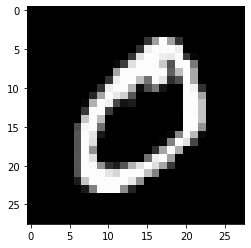

In [3]:
#confirm the data dimention
print(X_train.shape, X_test.shape) 
plt.imshow(X_train[1,:,:],cmap='gray')

* step3 标准化处理

In [4]:
# data pre-processing
X_train = X_train.reshape(-1, 28, 28, 1)/255
X_test = X_test.reshape(-1, 28, 28, 1)/255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


* step4 构建CNN网络

In [38]:
# model-sequential
model = Sequential([
    Conv2D(32, 3, strides=(1, 1), padding='same',activation="relu"),
    Conv2D(32, 3, strides=(1, 1), padding='same',activation="relu"),
    Conv2D(32, 3, strides=(1, 1), padding='same',activation="relu"),
    MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'),

    Conv2D(64, 3, strides=(1, 1), padding='same',activation="relu"),
    Conv2D(64, 3, strides=(1, 1), padding='same',activation="relu"),
    Conv2D(64, 3, strides=(1, 1), padding='same',activation="relu"),
    MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10),
    Activation('softmax')
])

In [34]:
# model-function
inputs = Input(shape=( 28, 28, 1))
x = Conv2D(32, 3, strides=(1, 1), padding='same',activation="relu")(inputs)
x = Conv2D(32, 3, strides=(1, 1), padding='same',activation="relu")(x)
x = Conv2D(32, 3, strides=(1, 1), padding='same',activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same')(x)

x = Conv2D(64, 3, strides=(1, 1), padding='same',activation="relu")(x)
x = Conv2D(64, 3, strides=(1, 1), padding='same',activation="relu")(x)
x = Conv2D(64, 3, strides=(1, 1), padding='same',activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same')(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)
model=Model(inputs, x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 64)        3692

* setp5 训练模型

In [36]:
# Another way to define your optimizer
rmsprop = RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train, epochs=10, verbose=1, shuffle=True, batch_size=128, validation_data=(X_test, y_test))

Training ------------
Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.3619 - accuracy: 0.8931 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0882 - accuracy: 0.9729 - val_loss: 0.0435 - val_accuracy: 0.9853
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0335 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0348 - val_accuracy: 0.9876
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0311 - val_accuracy: 0.9882
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0315 - accuracy: 0.9907 - val_loss: 0.0220 - val_accuracy: 0.9921
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0264 - accuracy: 0.9922 - val_loss: 0.0272 

(100, 10)
[[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]] 2


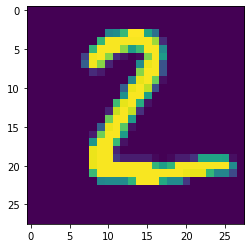

In [22]:
# test the model 
testdata = X_test[:100]
# get the probability value
pred = model.predict(testdata, batch_size=20)
# get the classification value
pred_c = np.argmax(pred, axis=1)
# pred_c=model.predict_classes(testdata, batch_size=20)
print(pred.shape)
reshapedata = testdata.reshape(-1,28,28)
plt.imshow(reshapedata[1,:,:])
print(np.round(pred[:1]*100), pred_c[1])

* setp5保存模型

In [10]:
model.save('./mnist.h5')

## 2.用训练好的模型识别手写数字

* step1 下载训练好的模型

In [11]:
model = load_model('./mnist.h5')

* step2 处理手写数字

In [12]:
def produceImage(file_in, width, height):
    """将原图转换为 28 *28（width * height） 图片"""
    image = Image.open(file_in)
    resized_image = image.resize((width, height), Image.ANTIALIAS)
    return resized_image



def produceMatrix(resized_image, width, height):
    """用转换后的图先生成一张灰度图，再用灰度图生成 ndarray（28*28） """
    image = resized_image.convert("L")  # 将 RGB 图片转换为 灰度（L） 图片
    # image.show()  # 打印图片
    data = image.getdata()
    data = np.array(data)
    data = np.reshape(data, (width, height))
    # print(data)  # 打印生成的 array
    return (255-data)/255 # 和训练数据格式一致

* step3 预测手写数字

In [13]:
def predict_name(file):
    file_in = file # 传入手写的数字图片的地址
    width = 28  # 修改后的宽
    height = 28  # 修改后的高
    resized_image = produceImage(file_in, width, height)
    data = produceMatrix(resized_image, width, height)
    data_norm = data.reshape(-1, 28, 28, 1)
    # 预测手写数字
    predict = model.predict(data_norm)
    predict = np.argmax(predict, 1)
    return predict, data

In [14]:
rootdir = '.\data'
list = os.listdir(rootdir) #列出文件夹下所有的目录与文件
predicts = []
datas = []
for i in range(0,len(list)):
    path = os.path.join(rootdir,list[i]) # 打印文件路径
    predict,data = predict_name(r"{}".format(path)) # 传入手写的数字图片的地址
    predicts.append(predict)
    datas.append(data)

* step3 展示预测结果

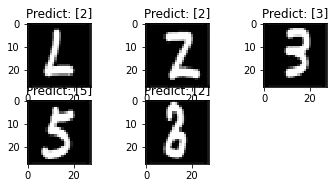

In [15]:
for i in range(len(list)):
    plt.subplot(3, 3, i+1) # 3行3列，第（i+1）个位置
    plt.imshow(datas[i], cmap='gray', interpolation='none')
    plt.title("Predict: {}".format(predicts[i]))
#     print(datas[i])
plt.show()